In [86]:
%matplotlib inline
# %matplotlib notebook
%config InlineBackend.figure_format = 'retina'
%config IPCompleter.greedy=True
import sys
sys.path.append('/Users/peter/Documents/4months/python/pymagnet/src')

import pymagnet as pm
import matplotlib.pyplot as plt
import numpy as np

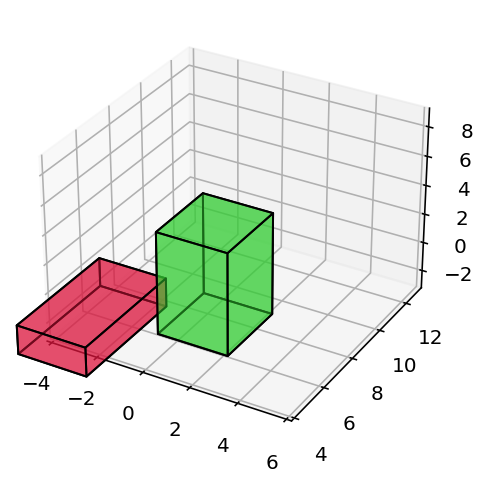

In [87]:
from mpl_toolkits.mplot3d import Axes3D

positions = [(-3,5,-2),(1,7,1)]
sizes = [(-3,5,-2), (3,3,7)]
colors = ["crimson","limegreen"]

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect('auto')

pc = pm.plot.draw_cuboids(positions,sizes,colors=colors, edgecolor="k", alpha=0.5)
ax.add_collection3d(pc)    

ax.set_xlim([-4,6])
ax.set_ylim([4,13])
ax.set_zlim([-3,9])

plt.show()

In [88]:
cb1 = pm.plot.generate_cuboid_faces(center=(0,0,0), size=(1,1,1))


In [89]:
def draw_polyhedra(**kwargs):
    """Generates face coordinates for

    Args:
        positions ([type]): [description]
        sizes ([type], optional): [description]. Defaults to None.
        colors ([type], optional): [description]. Defaults to None.

    Returns:
        ndarray: [description]
    """
    from mpl_toolkits.mplot3d.art3d import Poly3DCollection

    polyhedra = []
    colors = []
    for poly in pm.plot.Polyhedron.instances:
        polyhedra.append(poly.face_coords)
        colors.append(poly.color)
    return Poly3DCollection(
        np.concatenate(polyhedra), facecolors=np.repeat(colors, 6), **kwargs
    )

<ipython-input-90-e08a79513a8d>:29: UserWarning:

The following kwargs were not used by contour: 'lw'



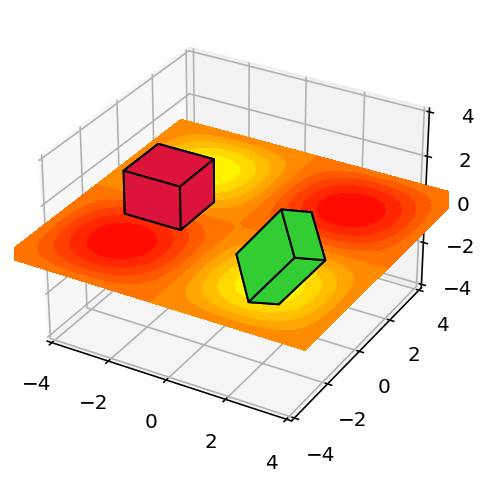

In [90]:
# from mpl_toolkits.mplot3d import Axes3D

pm.plot.reset_polyhedra()

center = (-3,1,0)
size = (2, 2, 2)
cuboid_1 = pm.plot.Graphic_Cuboid(center = center, size=size, alpha = 90, color='crimson')

center = (2,-1,0)
size = (1, 2, 3)

cuboid_2 = pm.plot.Graphic_Cuboid(center=center, size=size, alpha = 45, beta= 30, gamma=0, color='limegreen')


# fig = plt.figure(figsize=(8,6))
fig = plt.figure()

# ax = fig.gca(projection='3d')

ax = fig.add_subplot(111, projection="3d")
ax.set_aspect('auto')


CF = 5
X, Y = np.mgrid[-CF:CF:30j, -CF:CF:30j]
C = np.sin(np.pi*X/CF)*np.sin(np.pi*Y/CF)
Z = np.zeros_like(X)
# ax.plot_surface(X, Y, C, cmap="autumn_r", lw=0.5, rstride=1, cstride=1, alpha=0.5)
ax.contourf(X, Y, C, 10, lw=3, cmap="autumn_r", linestyles="solid", offset=0)

pc = draw_polyhedra(edgecolor="k", alpha=1)
ax.add_collection3d(pc)    


plot_lim = 4
ax.set_xlim([-plot_lim,plot_lim])
ax.set_ylim([-plot_lim,plot_lim])
ax.set_zlim([-plot_lim,plot_lim])

# ax.set_xlim([-4,6])
# ax.set_ylim([4,4])
# ax.set_zlim([-3,9])

plt.show()

In [99]:
pm.plot.reset_polyhedra()

center = (2,-1,0)
size = (1, 2, 3)

cuboid_2 = pm.plot.Graphic_Cuboid(center=center, size=size,
                                  alpha = 45, beta= 0, gamma=0,
                                  color='limegreen')


x = np.array([0, 0, 1, 1, 0, 0, 1, 1]) - 0.5
y = np.array([0, 1, 1, 0, 0, 1, 1, 0]) - 0.5
z = np.array([0, 0, 0, 0, 1, 1, 1, 1]) - 0.5

vec = np.vstack([x, y, z])

vec = np.multiply(vec.T, size).T

In [100]:
forward_rotation, _ = cuboid_2._generate_rotation_quaternions()
x, y, z = forward_rotation * vec
vec = np.vstack([x, y, z])

In [103]:


fig = go.Figure(data=[
    go.Mesh3d(
        # 8 vertices of a cube
        x=np.around(x,3),
        y=np.around(y,3),
        z=np.around(z,3),
        alphahull=0,
        colorbar_title='z',
        colorscale=[[0, 'gold'],
                    [0.5, 'mediumturquoise'],
                    [1, 'magenta']],    
        
        # Intensity of each vertex, which will be interpolated and color-coded
        intensity = np.linspace(0, 1, 8, endpoint=True),
       
        name='y',
        showscale=True
    )
])

fig.show()

In [92]:
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# # Equation of ring cyclide
# # see https://en.wikipedia.org/wiki/Dupin_cyclide
# import numpy as np
# a, b, d = 1.32, 1., 0.8
# c = a**2 - b**2
# u, v = np.mgrid[0:2*np.pi:100j, 0:2*np.pi:100j]
# x = (d * (c - a * np.cos(u) * np.cos(v)) + b**2 * np.cos(u)) / (a - c * np.cos(u) * np.cos(v))
# y = b * np.sin(u) * (a - d*np.cos(v)) / (a - c * np.cos(u) * np.cos(v))
# z = b * np.sin(v) * (c*np.cos(u) - d) / (a - c * np.cos(u) * np.cos(v))

# fig = make_subplots(rows=1, cols=1,
#                     )

# # fig.add_trace(go.Surface(x=x, y=y, z=z, colorbar_x=-0.07), 1, 1)
# fig.add_trace(go.Surface(x=X, y=Y, z=C, surfacecolor=C))
# fig.update_layout(title_text="Ring cyclide")
# fig.show()

